### normal problem techniques

In [4]:
import random
import statistics

# Problem: Maximize f(x) = x^2 where x is an integer in the range [0, 31]
# We'll use a binary representation for this problem

def fitness(individual):
    """
    Fitness function: f(x) = x^2
    
    :param individual: A binary string representing an integer
    :return: The square of the integer represented by the binary string
    """
    x = int(''.join(map(str, individual)), 2)
    return x * x

def binary_to_decimal(binary):
    """Convert a binary list to a decimal integer"""
    return int(''.join(map(str, binary)), 2)

# Population Initialization
def initialize_population(pop_size, chromosome_length):
    """
    Create an initial population of random binary strings
    
    :param pop_size: Number of individuals in the population
    :param chromosome_length: Length of each binary string
    :return: A list of binary strings (individuals)
    """
    return [[random.choice([0, 1]) for _ in range(chromosome_length)] for _ in range(pop_size)]

# Selection Methods

def tournament_selection(population, tournament_size):
    """
    Tournament Selection
    
    Randomly select 'tournament_size' individuals from the population
    and return the fittest one.
    
    :param population: List of individuals
    :param tournament_size: Number of individuals in each tournament
    :return: The winner of the tournament
    """
    tournament = random.sample(population, tournament_size)
    return max(tournament, key=fitness)

def roulette_wheel_selection(population):
    """
    Roulette Wheel Selection
    
    Select an individual from the population with probability
    proportional to its fitness.
    
    :param population: List of individuals
    :return: Selected individual
    """
    total_fitness = sum(fitness(ind) for ind in population)
    spin = random.uniform(0, total_fitness)
    current = 0
    for ind in population:
        current += fitness(ind)
        if current > spin:
            return ind

def rank_selection(population):
    """
    Rank Selection
    
    Rank individuals based on their fitness and select with
    probability proportional to their rank.
    
    :param population: List of individuals
    :return: Selected individual
    """
    sorted_pop = sorted(population, key=fitness)
    ranks = list(range(1, len(population) + 1))
    total_rank = sum(ranks)
    spin = random.uniform(0, total_rank)
    current = 0
    for ind, rank in zip(sorted_pop, ranks):
        current += rank
        if current > spin:
            return ind

# Crossover (Recombination) Methods

def single_point_crossover(parent1, parent2):
    """
    Single Point Crossover
    
    Choose a random point, swap the remaining parts
    
    :param parent1: First parent's chromosome
    :param parent2: Second parent's chromosome
    :return: Two offspring
    """
    point = random.randint(1, len(parent1) - 1)
    offspring1 = parent1[:point] + parent2[point:]
    offspring2 = parent2[:point] + parent1[point:]
    return offspring1, offspring2

def two_point_crossover(parent1, parent2):
    """
    Two Point Crossover
    
    Choose two random points, swap the part between these points
    
    :param parent1: First parent's chromosome
    :param parent2: Second parent's chromosome
    :return: Two offspring
    """
    point1, point2 = sorted(random.sample(range(len(parent1)), 2))
    offspring1 = parent1[:point1] + parent2[point1:point2] + parent1[point2:]
    offspring2 = parent2[:point1] + parent1[point1:point2] + parent2[point2:]
    return offspring1, offspring2

def uniform_crossover(parent1, parent2):
    """
    Uniform Crossover
    
    Randomly select bits from either parent
    
    :param parent1: First parent's chromosome
    :param parent2: Second parent's chromosome
    :return: Two offspring
    """
    offspring1 = [p1 if random.random() < 0.5 else p2 for p1, p2 in zip(parent1, parent2)]
    offspring2 = [p2 if random.random() < 0.5 else p1 for p1, p2 in zip(parent1, parent2)]
    return offspring1, offspring2

# Mutation Methods

def bit_flip_mutation(individual, mutation_rate):
    """
    Bit Flip Mutation
    
    Flip each bit with probability mutation_rate
    
    :param individual: The chromosome to mutate
    :param mutation_rate: Probability of flipping each bit
    :return: Mutated chromosome
    """
    return [1 - bit if random.random() < mutation_rate else bit for bit in individual]

# Main Genetic Algorithm

def genetic_algorithm(population_size, chromosome_length, generations, 
                      selection_method, crossover_method, mutation_method,
                      crossover_rate, mutation_rate):
    """
    Main Genetic Algorithm
    
    :param population_size: Number of individuals in the population
    :param chromosome_length: Length of each binary string
    :param generations: Number of generations to run
    :param selection_method: Function for selection
    :param crossover_method: Function for crossover
    :param mutation_method: Function for mutation
    :param crossover_rate: Probability of crossover
    :param mutation_rate: Probability of mutation
    :return: Best individual found
    """
    population = initialize_population(population_size, chromosome_length)
    
    for generation in range(generations):
        # Evaluation
        population = sorted(population, key=fitness, reverse=True)
        
        if generation % 10 == 0:
            best = population[0]
            print(f"Generation {generation}: Best = {binary_to_decimal(best)}, Fitness = {fitness(best)}")
        
        # Selection
        new_population = []
        while len(new_population) < population_size:
            parent1 = selection_method(population)
            parent2 = selection_method(population)
            
            # Crossover
            if random.random() < crossover_rate:
                offspring1, offspring2 = crossover_method(parent1, parent2)
            else:
                offspring1, offspring2 = parent1, parent2
            
            # Mutation
            offspring1 = mutation_method(offspring1, mutation_rate)
            offspring2 = mutation_method(offspring2, mutation_rate)
            
            new_population.extend([offspring1, offspring2])
        
        population = new_population[:population_size]
    
    return max(population, key=fitness)

# Run the algorithm with different parameters

print("Evolutionary Computation Concepts and Strategies")
print("================================================")

# Example 1: Tournament Selection, Single Point Crossover
print("\nExample 1: Tournament Selection, Single Point Crossover")
best1 = genetic_algorithm(
    population_size=100,
    chromosome_length=5,
    generations=50,
    selection_method=lambda pop: tournament_selection(pop, 3),
    crossover_method=single_point_crossover,
    mutation_method=bit_flip_mutation,
    crossover_rate=0.8,
    mutation_rate=0.1
)
print(f"Final Best: {binary_to_decimal(best1)}, Fitness: {fitness(best1)}")

# Example 2: Roulette Wheel Selection, Two Point Crossover
print("\nExample 2: Roulette Wheel Selection, Two Point Crossover")
best2 = genetic_algorithm(
    population_size=100,
    chromosome_length=5,
    generations=50,
    selection_method=roulette_wheel_selection,
    crossover_method=two_point_crossover,
    mutation_method=bit_flip_mutation,
    crossover_rate=0.8,
    mutation_rate=0.1
)
print(f"Final Best: {binary_to_decimal(best2)}, Fitness: {fitness(best2)}")

# Example 3: Rank Selection, Uniform Crossover
print("\nExample 3: Rank Selection, Uniform Crossover")
best3 = genetic_algorithm(
    population_size=100,
    chromosome_length=5,
    generations=50,
    selection_method=rank_selection,
    crossover_method=uniform_crossover,
    mutation_method=bit_flip_mutation,
    crossover_rate=0.8,
    mutation_rate=0.1
)
print(f"Final Best: {binary_to_decimal(best3)}, Fitness: {fitness(best3)}")

print("\nExplanation of Concepts:")
print("1. Selection Methods:")
print("   - Tournament Selection: Randomly select a group and choose the best.")
print("   - Roulette Wheel Selection: Select based on fitness proportions.")
print("   - Rank Selection: Select based on rank, reducing pressure on very fit individuals.")

print("\n2. Crossover Methods:")
print("   - Single Point Crossover: Swap parts after a random point.")
print("   - Two Point Crossover: Swap parts between two random points.")
print("   - Uniform Crossover: Randomly select bits from either parent.")

print("\n3. Mutation:")
print("   - Bit Flip Mutation: Randomly flip bits with a certain probability.")

print("\n4. Parameters:")
print("   - Crossover Rate: Probability of performing crossover.")
print("   - Mutation Rate: Probability of mutating each bit.")

print("\nThese concepts allow for tuning the balance between exploration (finding new solutions)")
print("and exploitation (improving known good solutions) in the genetic algorithm.")

Evolutionary Computation Concepts and Strategies

Example 1: Tournament Selection, Single Point Crossover
Generation 0: Best = 31, Fitness = 961
Generation 10: Best = 31, Fitness = 961
Generation 20: Best = 31, Fitness = 961
Generation 30: Best = 31, Fitness = 961
Generation 40: Best = 31, Fitness = 961
Final Best: 31, Fitness: 961

Example 2: Roulette Wheel Selection, Two Point Crossover
Generation 0: Best = 31, Fitness = 961
Generation 10: Best = 31, Fitness = 961
Generation 20: Best = 31, Fitness = 961
Generation 30: Best = 31, Fitness = 961
Generation 40: Best = 31, Fitness = 961
Final Best: 31, Fitness: 961

Example 3: Rank Selection, Uniform Crossover
Generation 0: Best = 31, Fitness = 961
Generation 10: Best = 31, Fitness = 961
Generation 20: Best = 31, Fitness = 961
Generation 30: Best = 31, Fitness = 961
Generation 40: Best = 31, Fitness = 961
Final Best: 31, Fitness: 961

Explanation of Concepts:
1. Selection Methods:
   - Tournament Selection: Randomly select a group and cho

### understanding parameters

Initialization complete. Population shape: (100, 10)
lambda_: 10, mu: 5, pop_size: 100
Generation 0: Best Fitness = -33.822578, Mean σ = 1.000000
Generation 10: Best Fitness = -8.815829, Mean σ = 1.000000
Generation 20: Best Fitness = -2.978635, Mean σ = 1.000000
Generation 30: Best Fitness = -2.978635, Mean σ = 1.000000
Generation 40: Best Fitness = -2.978635, Mean σ = 1.000000
Generation 50: Best Fitness = -2.959436, Mean σ = 1.000000
Generation 60: Best Fitness = -2.959436, Mean σ = 1.000000
Generation 70: Best Fitness = -1.933191, Mean σ = 1.000000
Generation 80: Best Fitness = -1.933191, Mean σ = 1.000000
Generation 90: Best Fitness = -1.933191, Mean σ = 1.000000


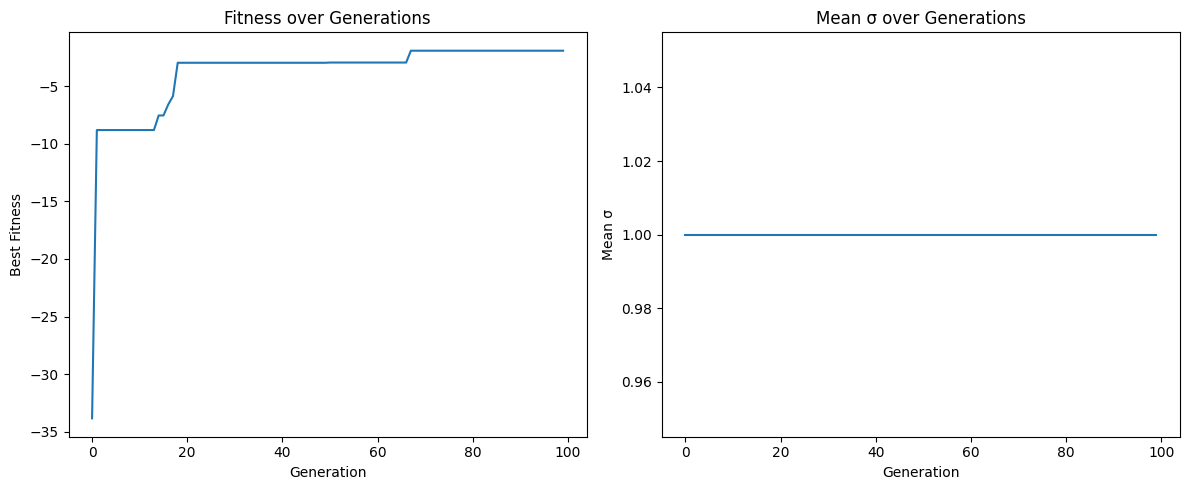

AttributeError: 'EvolutionStrategy' object has no attribute 'compare_with_ga_ep'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy

class EvolutionStrategy:
    def __init__(self, dim, pop_size, generations, selection_method='(μ,λ)', recombination_method='intermediate', mutation_distribution='gaussian'):
        self.dim = dim
        self.pop_size = min(pop_size, 1000)
        self.generations = generations
        self.selection_method = selection_method
        self.recombination_method = recombination_method
        self.mutation_distribution = mutation_distribution
        
        # Initialize population
        self.population = np.random.uniform(-5, 5, (self.pop_size, dim))
        
        # Strategy parameters
        self.sigma = np.ones(self.pop_size)
        self.sigma_min, self.sigma_max = 1e-5, 1.0
        
        # Population size heuristic
        self.lambda_ = min(int(4 + 3 * np.log(dim)), self.pop_size)
        self.mu = min(self.lambda_ // 2, self.pop_size)
        
        self.best_individual = None
        self.best_fitness = -np.inf
        
        print(f"Initialization complete. Population shape: {self.population.shape}")
        print(f"lambda_: {self.lambda_}, mu: {self.mu}, pop_size: {self.pop_size}")
        
    def fitness(self, x):
        # Sphere function (to be minimized)
        return -np.sum(x**2)  # Negative because we're maximizing
    
    def recombine(self, parents):
        if self.recombination_method == 'discrete':
            mask = np.random.randint(2, size=self.dim)
            child = np.where(mask, parents[0], parents[1])
        elif self.recombination_method == 'intermediate':
            child = np.mean(parents, axis=0)
        return child

    def mutate(self, individual, sigma):
        if self.mutation_distribution == 'gaussian':
            noise = np.random.randn(self.dim)
        elif self.mutation_distribution == 'cauchy':
            noise = np.random.standard_cauchy(self.dim)
        
        mutated = individual + sigma * noise
        return np.clip(mutated, -10, 10)  # Bound individuals

    def select(self, population, fitness_values):
        sorted_indices = np.argsort(fitness_values)
        if self.selection_method == '(μ,λ)':
            selected_indices = sorted_indices[-self.pop_size:]
        elif self.selection_method == '(μ+λ)':
            selected_indices = sorted_indices[-self.pop_size:]
        
        # Elitism: Always include the best individual
        if self.best_individual is not None:
            selected_indices[-1] = len(population) - 1
        
        return population[selected_indices]

    def adapt_parameters(self, success_rate):
        # 1/5 success rule
        self.sigma *= np.where(success_rate > 0.2, 1.22, 0.82)
        self.sigma = np.clip(self.sigma, self.sigma_min, self.sigma_max)

    def run(self):
        fitness_history = []
        sigma_history = []
        
        for generation in range(self.generations):
            offspring = []
            for _ in range(self.lambda_):
                parent_indices = np.random.choice(self.pop_size, 2, replace=False)
                parents = self.population[parent_indices]
                child = self.recombine(parents)
                child = self.mutate(child, self.sigma[parent_indices[0]])
                offspring.append(child)
            
            if self.best_individual is not None:
                offspring.append(self.best_individual)
            
            all_individuals = np.vstack([self.population, offspring])
            fitness_values = np.array([self.fitness(ind) for ind in all_individuals])
            
            # Update best individual
            best_idx = np.argmax(fitness_values)
            if fitness_values[best_idx] > self.best_fitness:
                self.best_individual = all_individuals[best_idx]
                self.best_fitness = fitness_values[best_idx]
            
            self.population = self.select(all_individuals, fitness_values)
            
            success_rate = np.mean(fitness_values[-self.pop_size:] > np.mean(fitness_values[:-self.pop_size]))
            self.adapt_parameters(success_rate)
            
            fitness_history.append(self.best_fitness)
            sigma_history.append(np.mean(self.sigma))
            
            if generation % 10 == 0:
                print(f"Generation {generation}: Best Fitness = {self.best_fitness:.6f}, Mean σ = {np.mean(self.sigma):.6f}")
        
        return fitness_history, sigma_history

        # print("Comparison with GA and EP:")
        # print("ES: Focuses on self-adaptation and continuous parameter optimization")
        # print("EP: Emphasizes mutation and doesn't use crossover")
    


# Example usage
es = EvolutionStrategy(dim=10, pop_size=100, generations=100, 
                       selection_method='(μ,λ)', 
                       recombination_method='intermediate', 
                       mutation_distribution='gaussian')
fitness_history, sigma_history = es.run()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fitness_history)
plt.title('Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')

plt.subplot(1, 2, 2)
plt.plot(sigma_history)
plt.title('Mean σ over Generations')
plt.xlabel('Generation')
plt.ylabel('Mean σ')

plt.tight_layout()
plt.show()

es.compare_with_ga_ep()
es.es_applications()

ES Generation 0: Best Fitness = -12.572122
ES Generation 10: Best Fitness = -2.200072
ES Generation 20: Best Fitness = -0.343356
ES Generation 30: Best Fitness = -0.113868
ES Generation 40: Best Fitness = -0.058854
ES Generation 50: Best Fitness = -0.018400
ES Generation 60: Best Fitness = -0.005307
ES Generation 70: Best Fitness = -0.002268
ES Generation 80: Best Fitness = -0.000848
ES Generation 90: Best Fitness = -0.000168
EP Generation 0: Best Fitness = -26.684214
EP Generation 10: Best Fitness = -12.003672
EP Generation 20: Best Fitness = -6.376430
EP Generation 30: Best Fitness = -5.468910
EP Generation 40: Best Fitness = -2.682278
EP Generation 50: Best Fitness = -2.453138
EP Generation 60: Best Fitness = -1.064287
EP Generation 70: Best Fitness = -1.064287
EP Generation 80: Best Fitness = -1.064287
EP Generation 90: Best Fitness = -0.697763


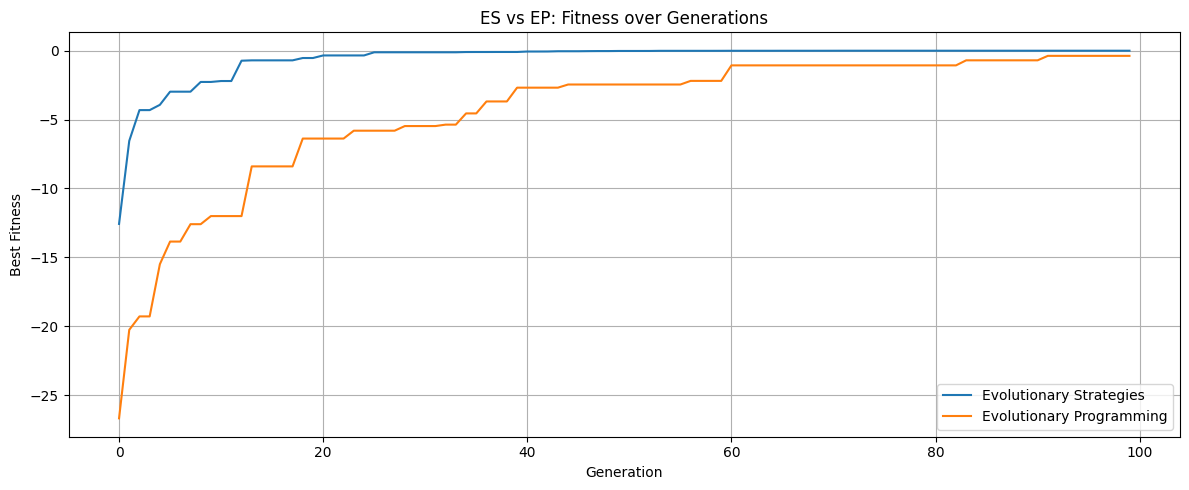


Comparison of ES and EP:
ES: Uses recombination and adapts a single step size for all dimensions.
EP: Relies solely on mutation and adapts individual step sizes for each dimension.

Key Differences:
1. Recombination: ES uses it, EP doesn't.
2. Mutation: ES typically uses a single step size, EP uses individual step sizes.
3. Self-adaptation: ES often adapts a global step size, EP adapts step sizes for each parameter.
4. Selection: ES typically uses (μ,λ) or (μ+λ) selection, EP often uses tournament selection (simplified in this implementation).


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class EvolutionStrategy:
    def __init__(self, dim, pop_size, generations):
        self.dim = dim
        self.pop_size = pop_size
        self.generations = generations
        self.population = np.random.uniform(-5, 5, (pop_size, dim))
        self.sigma = np.ones(pop_size)
        self.sigma_min, self.sigma_max = 1e-5, 1.0
        self.best_fitness = -np.inf

    def fitness(self, x):
        return -np.sum(x**2)  # Negative because we're maximizing

    def recombine(self, parents):
        return np.mean(parents, axis=0)

    def mutate(self, individual, sigma):
        return np.clip(individual + sigma * np.random.randn(self.dim), -10, 10)

    def adapt_sigma(self, success_rate):
        self.sigma *= np.where(success_rate > 0.2, 1.22, 0.82)
        self.sigma = np.clip(self.sigma, self.sigma_min, self.sigma_max)

    def run(self):
        fitness_history = []
        for generation in range(self.generations):
            offspring = []
            for _ in range(self.pop_size):
                parents = self.population[np.random.choice(self.pop_size, 2, replace=False)]
                child = self.recombine(parents)
                child = self.mutate(child, self.sigma[0])
                offspring.append(child)
            
            offspring = np.array(offspring)
            all_individuals = np.vstack([self.population, offspring])
            fitness_values = np.array([self.fitness(ind) for ind in all_individuals])
            
            sorted_indices = np.argsort(fitness_values)
            self.population = all_individuals[sorted_indices[-self.pop_size:]]
            self.best_fitness = fitness_values[sorted_indices[-1]]
            
            success_rate = np.mean(fitness_values[-self.pop_size:] > np.mean(fitness_values[:self.pop_size]))
            self.adapt_sigma(success_rate)
            
            fitness_history.append(self.best_fitness)
            
            if generation % 10 == 0:
                print(f"ES Generation {generation}: Best Fitness = {self.best_fitness:.6f}")
        
        return fitness_history

class EvolutionaryProgramming:
    def __init__(self, dim, pop_size, generations):
        self.dim = dim
        self.pop_size = pop_size
        self.generations = generations
        self.population = np.random.uniform(-5, 5, (pop_size, dim))
        self.sigma = np.ones((pop_size, dim))
        self.best_fitness = -np.inf

    def fitness(self, x):
        return -np.sum(x**2)  # Negative because we're maximizing

    def mutate(self, individual, sigma):
        new_individual = individual + sigma * np.random.randn(self.dim)
        new_sigma = sigma * np.exp(np.random.randn(self.dim) / np.sqrt(2 * self.dim))
        return np.clip(new_individual, -10, 10), new_sigma

    def run(self):
        fitness_history = []
        for generation in range(self.generations):
            offspring = []
            offspring_sigma = []
            for i in range(self.pop_size):
                child, child_sigma = self.mutate(self.population[i], self.sigma[i])
                offspring.append(child)
                offspring_sigma.append(child_sigma)
            
            offspring = np.array(offspring)
            offspring_sigma = np.array(offspring_sigma)
            all_individuals = np.vstack([self.population, offspring])
            all_sigma = np.vstack([self.sigma, offspring_sigma])
            fitness_values = np.array([self.fitness(ind) for ind in all_individuals])
            
            sorted_indices = np.argsort(fitness_values)
            self.population = all_individuals[sorted_indices[-self.pop_size:]]
            self.sigma = all_sigma[sorted_indices[-self.pop_size:]]
            self.best_fitness = fitness_values[sorted_indices[-1]]
            
            fitness_history.append(self.best_fitness)
            
            if generation % 10 == 0:
                print(f"EP Generation {generation}: Best Fitness = {self.best_fitness:.6f}")
        
        return fitness_history

# Run both algorithms
dim = 10
pop_size = 100
generations = 100

es = EvolutionStrategy(dim, pop_size, generations)
ep = EvolutionaryProgramming(dim, pop_size, generations)

es_fitness_history = es.run()
ep_fitness_history = ep.run()

# Plot results
plt.figure(figsize=(12, 5))
plt.plot(es_fitness_history, label='Evolutionary Strategies')
plt.plot(ep_fitness_history, label='Evolutionary Programming')
plt.title('ES vs EP: Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nComparison of ES and EP:")
print("ES: Uses recombination and adapts a single step size for all dimensions.")
print("EP: Relies solely on mutation and adapts individual step sizes for each dimension.")
print("\nKey Differences:")
print("1. Recombination: ES uses it, EP doesn't.")
print("2. Mutation: ES typically uses a single step size, EP uses individual step sizes.")
print("3. Self-adaptation: ES often adapts a global step size, EP adapts step sizes for each parameter.")
print("4. Selection: ES typically uses (μ,λ) or (μ+λ) selection, EP often uses tournament selection .")